In [ ]:
mylist=[20,20,40,50,60,70]
mylist[:4]

In [ ]:
mydict={"st_1":"Helly","st_2":"Dharmik"}
mydict["st_1"]
mydict.keys()
mydict.values()

In [ ]:
company={"st_1":["Yahoo"],"st_2":["TCS","Infosys","Google"]}
company["st_2"][2]

In [1]:
import pandas as pd
df = pd.read_csv("Uber Drives 2016.csv")
df.dtypes

FileNotFoundError: [Errno 2] No such file or directory: 'Uber Drives 2016.csv'

In [ ]:
df.head(n=10)

In [ ]:
df.shape

In [ ]:
temp=pd.DataFrame({"A":["1","2","3"],"B":[11,12,13],"C": ["12-06-2012","13-06-2015","15-06-2017"]})

In [ ]:
temp

In [ ]:
temp["C"] = pd.to_datetime(temp["C"])

temp.dtypes

In [ ]:
pd.to_datetime(["2016-12-23","abc"],errors="coerce")

In [ ]:
temp["A"] = pd.to_numeric(temp["A"])

In [ ]:
temp.dtypes

In [ ]:
df.describe(include="all")

In [ ]:
df["START*"].value_counts()

In [ ]:
df.iloc[0:5,0:4]

In [ ]:
df.iloc[0:5,[1,3]]

In [ ]:
df.iloc[0:3]

In [ ]:
 df.iloc[:,2:9]

In [ ]:
tmep1=df.iloc[:,:-1]
print(tmep1.shape)
df.shape

In [ ]:
df.loc[:,["START*","STOP*"]]
abc = df.loc[:,["START*"]]
type(abc)
abc

In [ ]:
df.loc[0:4,["START_DATE*","MILES*"]]

In [ ]:
#df[df["MILES*"] > 10]
df2 = df.loc[df["MILES*"]>10,["MILES*","START_DATE*"]]
df2

In [ ]:
df.loc[df["START*"]=="New York",["MILES*"]].head()

In [ ]:
df[df["START*"].isin(["Cary","Morrisville"])].head()

In [ ]:
df3 = df[(df["MILES*"]>10) & (df["START*"].isin(["Cary","Morris"]))]
df3.reset_index(inplace=True,drop=True)
df3

In [ ]:
df.sort_values(by=["MILES*"],ascending=False).head(n=5)

In [ ]:
df.sort_values(by=["START*","MILES*"],ascending=[True,False]).head(n=5)

In [ ]:
import numpy as np
#df["miles_cat"] = np.where(df["MILES*"]>5,"Long Trip","Short Trip")

In [ ]:
df.head(5)

In [ ]:
df["miles_cat"] = np.where(df["MILES*"]>=10,"Long Trip",
                           np.where((df["MILES*"]>=5) & (df["MILES*"]<10),"Medium Trip",
                                   np.where(df["MILES*"]<5,"Short Trip","NaN")))

In [ ]:
df.head(10)

In [ ]:
df.groupby("START*")["MILES*"].agg("mean")

In [1]:
df.groupby(["START*","STOP*"]).agg(["mean","sum"])

NameError: name 'df' is not defined

In [ ]:
df.tail()

In [ ]:
df = df.iloc[:-1,:]

In [ ]:
df.tail()

In [ ]:
df.dtypes

In [ ]:
df["START_DATE*"] = pd.to_datetime(df["START_DATE*"])
df.dtypes

In [ ]:
res=df.groupby("START*").agg({
    "MILES*":["mean"],
    "START_DATE*":["min","max"]
})
res.reset_index(inplace=True)
print(res.columns)
res.columns = ["START_LOCATION","AVG_DIST","EARLIEST_TRIP","RECENT_TRIP"]
res

In [2]:
store_sale = pd.read_csv("store_sales.csv")
store_sale.apply("mean",axis=1)

0     14.833333
1     14.500000
2     15.083333
3     11.250000
4     13.250000
        ...    
95    15.416667
96    12.833333
97    14.000000
98    14.416667
99    15.000000
Length: 100, dtype: float64

In [3]:
store_sale.head()

,store_id,city,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
0,S_1,Texas,8,20,13,21,17,20,24,17,16,9,7,6
1,S_2,California,12,19,15,15,11,19,7,15,10,11,21,19
2,S_3,California,16,16,14,19,23,6,13,13,15,14,24,8
3,S_4,Texas,8,18,13,10,14,14,6,8,8,18,7,11
4,S_5,Texas,19,5,24,9,5,24,10,5,24,15,6,13


In [ ]:
store_sale.groupby("city").agg("mean")

In [4]:
import numpy as np

def bonus_fun(sales_col):
    eligible_value = np.where(sales_col > 10, "Eligible", "Not Eligible")
    return eligible_value

store_sale["Bonus"] = bonus_fun(store_sale["Jan"])
store_sale

,store_id,city,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec,Bonus
0,S_1,Texas,8,20,13,21,17,20,24,17,16,9,7,6,Not Eligible
1,S_2,California,12,19,15,15,11,19,7,15,10,11,21,19,Eligible
2,S_3,California,16,16,14,19,23,6,13,13,15,14,24,8,Eligible
3,S_4,Texas,8,18,13,10,14,14,6,8,8,18,7,11,Not Eligible
4,S_5,Texas,19,5,24,9,5,24,10,5,24,15,6,13,Eligible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,S_96,Texas,7,10,20,20,10,15,15,21,15,7,23,22,Not Eligible
96,S_97,California,13,6,7,15,22,10,21,23,10,6,12,9,Eligible
97,S_98,Texas,16,9,6,14,20,13,11,10,8,22,17,22,Eligible
98,S_99,Arizona,18,16,9,5,12,22,11,13,21,17,19,10,Eligible


In [6]:
newdf = store_sale.select_dtypes(['int64','float64']).apply(bonus_fun)

In [7]:
newdf

,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec
0,Not Eligible,Eligible,Eligible,Eligible,Eligible,Eligible,Eligible,Eligible,Eligible,Not Eligible,Not Eligible,Not Eligible
1,Eligible,Eligible,Eligible,Eligible,Eligible,Eligible,Not Eligible,Eligible,Not Eligible,Eligible,Eligible,Eligible
2,Eligible,Eligible,Eligible,Eligible,Eligible,Not Eligible,Eligible,Eligible,Eligible,Eligible,Eligible,Not Eligible
3,Not Eligible,Eligible,Eligible,Not Eligible,Eligible,Eligible,Not Eligible,Not Eligible,Not Eligible,Eligible,Not Eligible,Eligible
4,Eligible,Not Eligible,Eligible,Not Eligible,Not Eligible,Eligible,Not Eligible,Not Eligible,Eligible,Eligible,Not Eligible,Eligible
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Not Eligible,Not Eligible,Eligible,Eligible,Not Eligible,Eligible,Eligible,Eligible,Eligible,Not Eligible,Eligible,Eligible
96,Eligible,Not Eligible,Not Eligible,Eligible,Eligible,Not Eligible,Eligible,Eligible,Not Eligible,Not Eligible,Eligible,Not Eligible
97,Eligible,Not Eligible,Not Eligible,Eligible,Eligible,Eligible,Eligible,Not Eligible,Not Eligible,Eligible,Eligible,Eligible
98,Eligible,Eligible,Not Eligible,Not Eligible,Eligible,Eligible,Eligible,Eligible,Eligible,Eligible,Eligible,Not Eligible


In [ ]:
df4 = pd.concat([store_sale,newdf],axis=1)

In [ ]:
df4

In [9]:
distance = [45,50,35]
speed = [5,10,7]

In [10]:
import numpy as np

dist = np.array(distance)
spd = np.array(speed)

print(dist)
print(spd)
div=dist/spd
div

[45 50 35]
[ 5 10  7]


array([9., 5., 5.])

In [11]:
a=[1,2,3,4,5]                                 # initialize a list and assign values to it
b=[10,20,30,40]
print (a + b)


[1, 2, 3, 4, 5, 10, 20, 30, 40]


In [12]:
f=np.array((10,20,30,40,"Helly"))
g=np.array((1,2,3,4,5))

print(f)
f.dtype

#print(g)
#print(f+g)


['10' '20' '30' '40' 'Helly']


dtype('<U11')

In [ ]:
c = np.arange(10)
c

In [ ]:
c1 = np.arange(5,56,5)
c1

In [ ]:
data = np.array((32,45,123,756,23,2123,1,2,3,4,5,6,6,5,4,3,2,1,78,89,87,76,54,31))
data.shape

In [ ]:
data2 = data.reshape(8,3)
data2

In [ ]:
data2 = data.reshape(2,2,6)
data2

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

housing = pd.read_csv("housing_prices.csv")
housing.shape

(1460, 81)

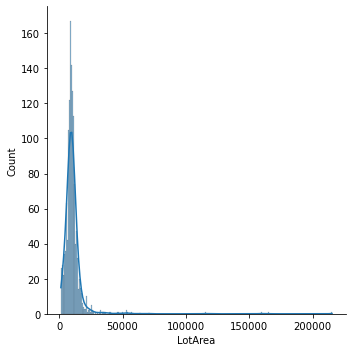

In [5]:
sns.displot(housing["LotArea"],kde=True)

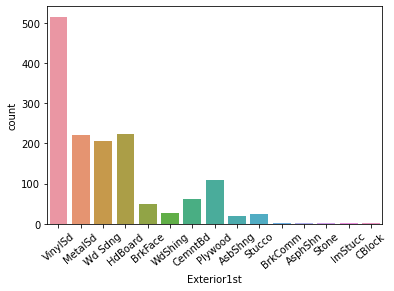

In [6]:
plot = sns.countplot(x = "Exterior1st", data = housing)
plot.set_xticklabels(plot.get_xticklabels(), rotation=40);

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

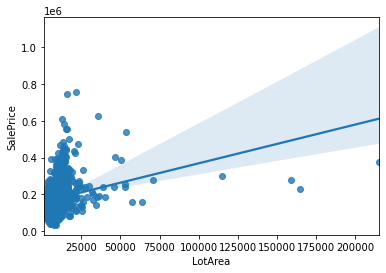

In [7]:
sns.regplot(x = "LotArea", y = "SalePrice", data = housing)

In [8]:
housing["LotArea"].quantile([0.5,0.95,0.99])

0.50     9478.50
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

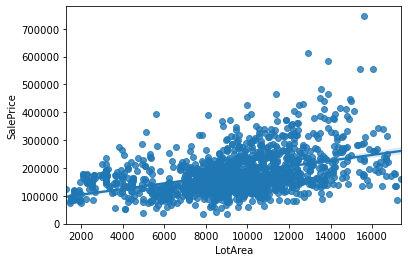

In [9]:
housing_sub = housing.loc[housing["LotArea"] < housing["LotArea"].quantile(0.95)]
sns.regplot(x = "LotArea", y = "SalePrice", data = housing_sub)

In [10]:
sf_cols = [col_name for col_name in housing.columns if "SF" in col_name]
sf_cols

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'WoodDeckSF',
 'OpenPorchSF']

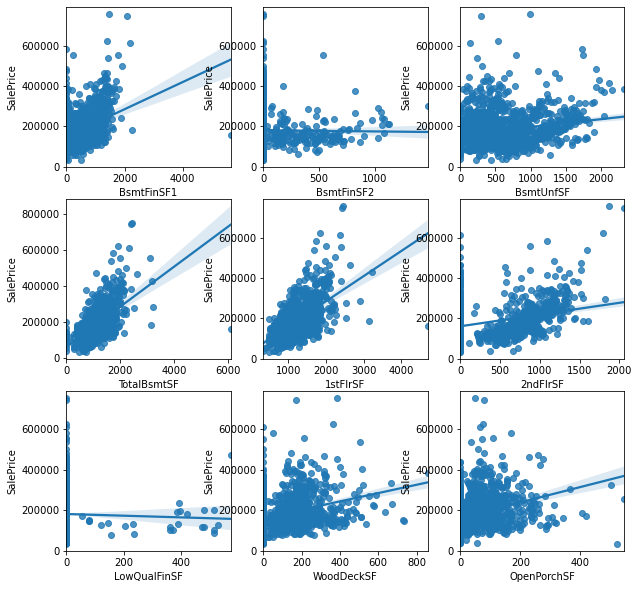

In [11]:
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (10,10))
for i in range(0,len(sf_cols)):
    rows=i//3
    cols=i%3
    ax = axs[rows, cols]
    plot = sns.regplot(x = sf_cols[i], y = "SalePrice", data = housing, ax=ax)

In [12]:
housing["Exterior1st"].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
CBlock       1
ImStucc      1
Name: Exterior1st, dtype: int64

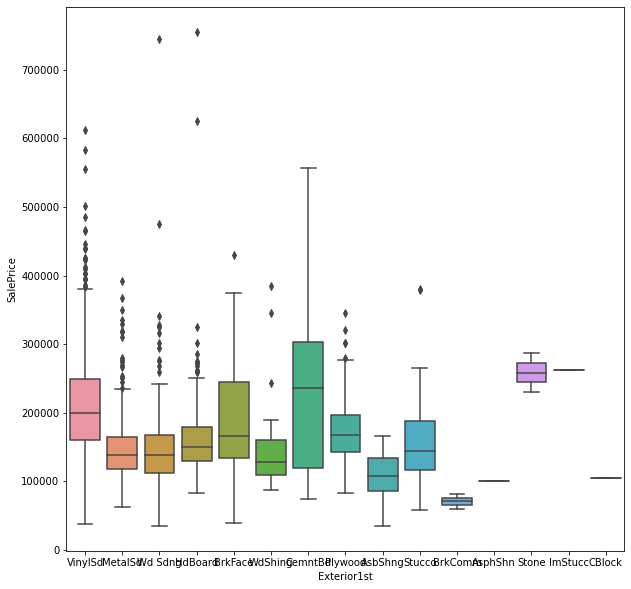

In [13]:
fig, axs = plt.subplots(figsize = (10,10))
sns.boxplot(x = "Exterior1st", y = "SalePrice", data = housing, ax=axs);